## WEIGHTED RESIDUAL METHODS

### GALERKIN'S METHOD

We approximate the solution $u(x)$ by $ u_{app}(x)=\sum_{j=0}^{n} a_j\,\phi_j(x)$,

and define the **residual**
$$
R(x;\mathbf a)=\mathcal L[u_{app}](x)-f(x).
$$

In the **Galerkin method**, the residual is required to be **orthogonal** to the space spanned by the trial functions:
$$
\int_\Omega w_i(x)\,R(x;\mathbf a)\,dx=0,\qquad
w_i=\phi_i,\quad i=1,\dots,n.
$$
That is,
$$
\int_\Omega \phi_i\,[\,\mathcal L(u_{app})-f\,]\,dx=0.
$$

This yields the system

$$
\sum_{j=1}^{n} a_j
\int_\Omega \phi_i\,\mathcal L[\phi_j]\,dx =
\int_\Omega \phi_i\,f(x)\,dx,
\qquad i=1,\dots,n,
$$
or in matrix form,
$$
\mathbf{A}\mathbf{a}=\mathbf{r},\quad
A_{ij}=\int_\Omega \phi_i\,\mathcal L[\phi_j]\,dx,\quad
r_i=\int_\Omega \phi_i\,f\,dx.
$$
If $\mathcal L$ is **self-adjoint** and the boundary conditions are homogeneous,
$\mathbf A$ is **symmetric**, and the method coincides with the **variational (weak) formulation**.

In [1]:
import sympy
from sympy import symbols
from sympy.plotting import plot

In [3]:
x = symbols('x')
L = 1

In [4]:
a0, a1, a2 = symbols('a0 a1 a2')
phi0, phi1, phi2 = symbols('phi0 phi1 phi2')

In [7]:
phi0 = 1
phi1 = x
phi2 = x**2

In [9]:
u_app = a0*phi0 + a1*phi1 + a2*phi2

In [11]:
BC1 = u_app.subs(x,0)
BC2 = u_app.subs(x,1)

In [13]:
u_app

a0 + a1*x + a2*x**2

In [15]:
BC_sol = sympy.solve([BC1,BC2],[a0,a1])

In [17]:
BC_sol

{a0: 0, a1: -a2}

In [19]:
u_app = u_app.subs(a0,BC_sol[a0])
u_app = u_app.subs(a1,BC_sol[a1])

In [21]:
u_app

a2*x**2 - a2*x

In [23]:
R = sympy.diff(sympy.diff(u_app,x),x)+u_app-x
LHS1 = sympy.integrate(sympy.diff(u_app,a2)*R,(x,0,L))

In [25]:
eq_sol = sympy.solve([LHS1],[a2])

In [27]:
eq_sol

{a2: 5/18}

In [29]:
u_app = u_app.subs(a2,eq_sol[a2])

In [31]:
u_app

5*x**2/18 - 5*x/18

In [33]:
from sympy import symbols, Function, dsolve
import sympy
import matplotlib.pyplot as plt
x = symbols('x')
u_true = Function('u')(x)

In [35]:
up = u_true.diff(x)
upp = up.diff(x)
eqn = upp + u_true - x

In [37]:
u_true = dsolve(eqn, ics={u_true.subs(x,0):0, u_true.subs(x,L):0})

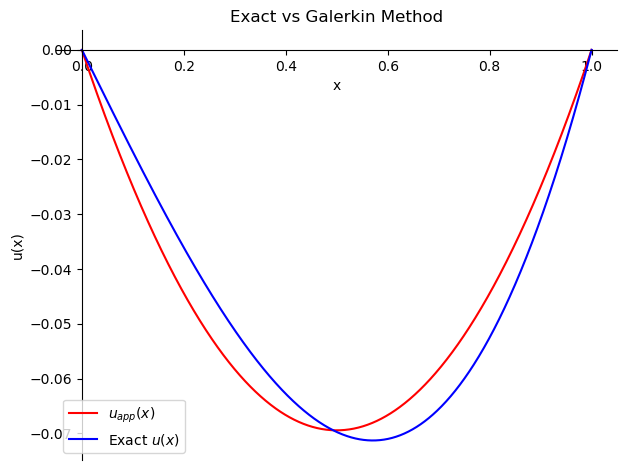

In [39]:
plt = plot( (u_app, (x, 0, L)), (u_true.rhs, (x, 0, L)), show=False)
#
plt[0].line_color = 'red'
plt[0].label = '$u_{app}(x)$'
plt[1].line_color = 'blue'
plt[1].label = 'Exact $u(x)$'
#
plt.legend = True
plt.title = 'Exact vs Galerkin Method'
plt.xlabel = 'x'
plt.ylabel = 'u(x)'
plt.show()